In [18]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os

In [19]:
directory=""
csv_file ='Data_Intel.csv'
csv_path=os.path.join(directory,csv_file)

In [20]:
data = pd.read_csv(csv_path)
data.head()

Distribution_Center  SKU_Code Product_Offering  Generation  ASP Group  Week  \
0                   D  Prod_A_2                A           2          1     2   
1                   D  Prod_A_2                A           2          1     3   
2                   D  Prod_A_2                A           2          1     4   
3                   D  Prod_A_2                A           2          1     5   
4                   D  Prod_A_2                A           2          1     6   

   Forecasted  Unconstrained_Demand  
0        1159                  2401  
1        3080                  2062  
2        3428                  3022  
3        3229                  2650  
4        6757                  2525

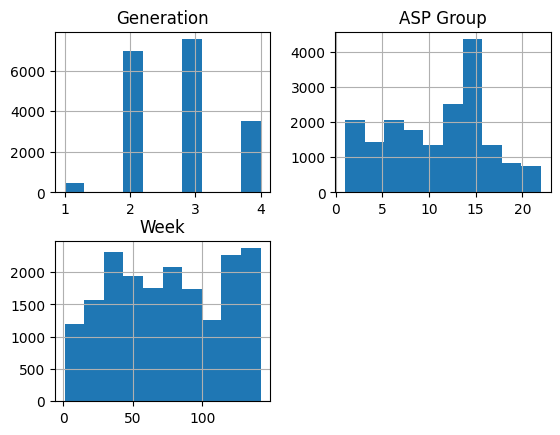

In [21]:
viz = data[['Generation', 'ASP Group', 'Week']]
viz.hist()
plt.show()

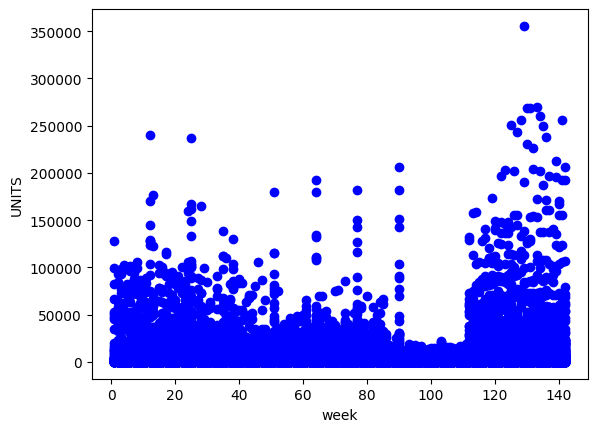

In [22]:
plt.scatter(data.Week, data.Forecasted,  color='blue')
plt.xlabel("week")
plt.ylabel("UNITS")
plt.show()

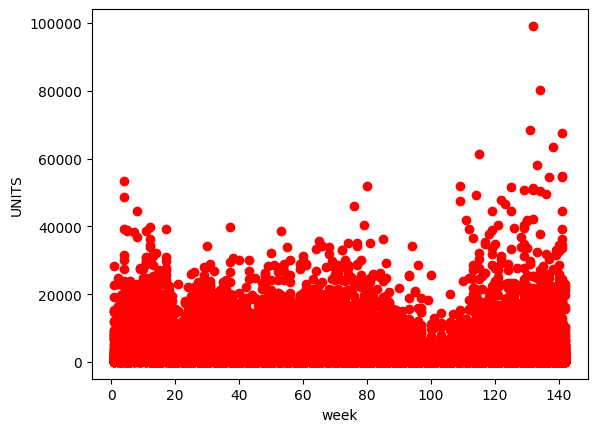

In [23]:
plt.scatter(data.Week, data.Unconstrained_Demand, color = 'red')
plt.xlabel("week")
plt.ylabel("UNITS")
plt.show()

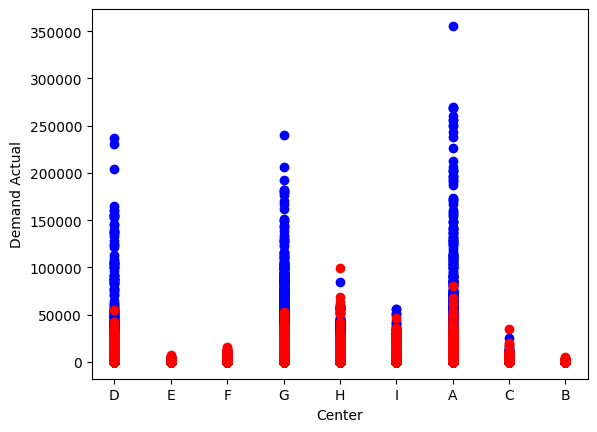

In [24]:
plt.scatter(data.Distribution_Center, data.Forecasted, color = 'blue')
plt.scatter(data.Distribution_Center, data.Unconstrained_Demand, color = 'red')
plt.xlabel("Center")
plt.ylabel("Demand Actual")
plt.show()



In [25]:
data_subset_fore = data[['SKU_Code', 'Week', 'Forecasted']]
data_subset_dem = data[['SKU_Code', 'Week', 'Unconstrained_Demand']]



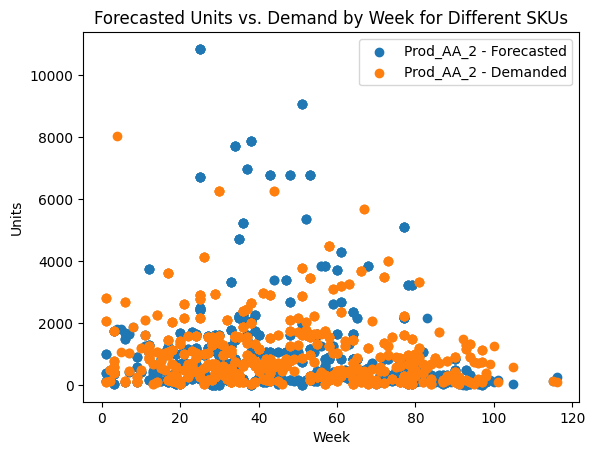

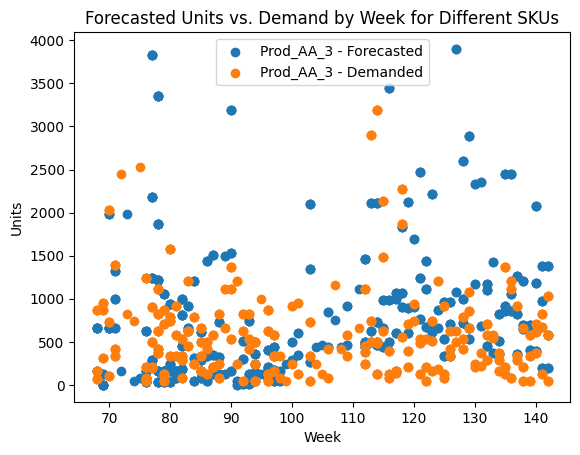

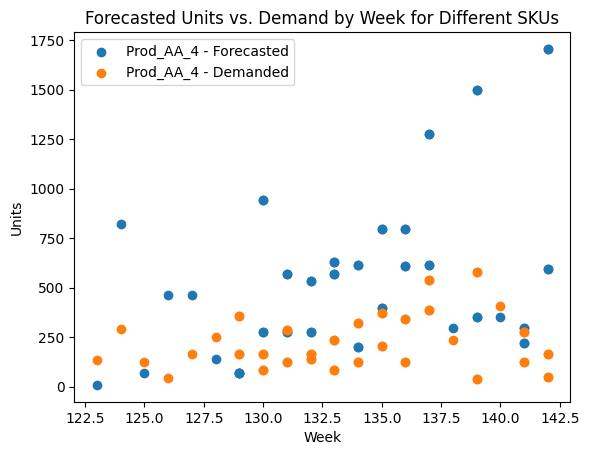

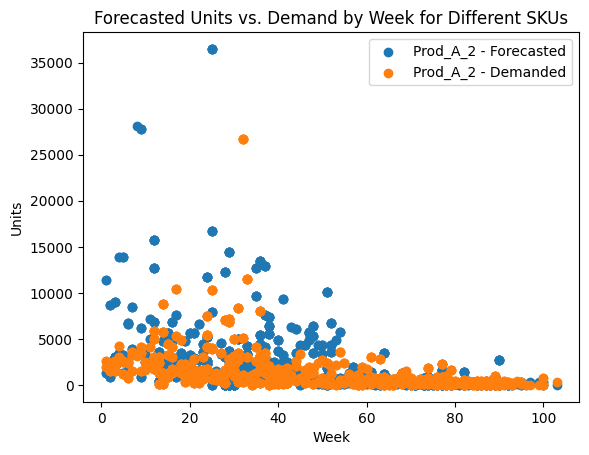

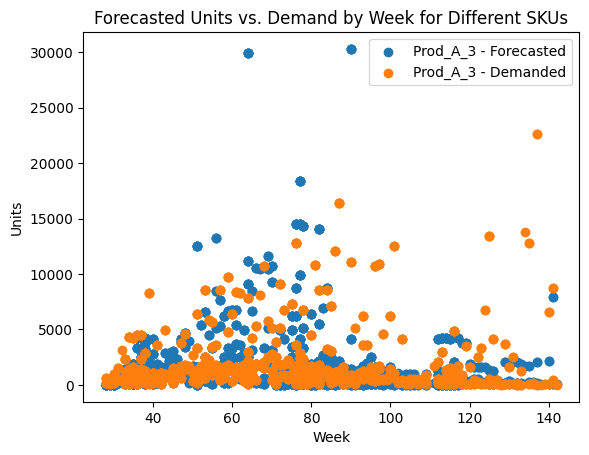

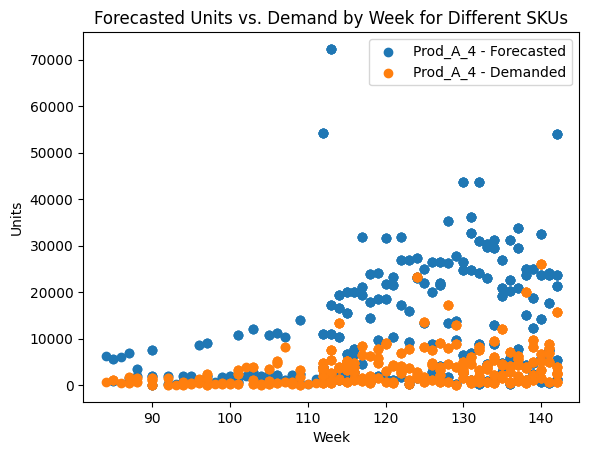

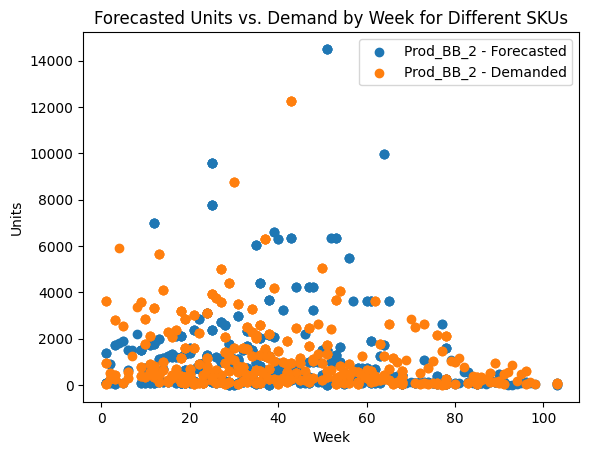

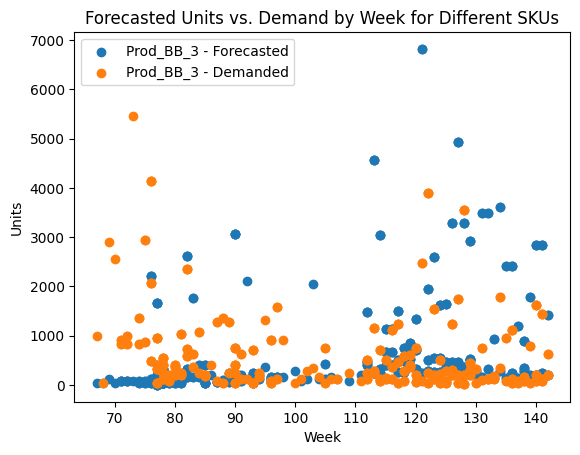

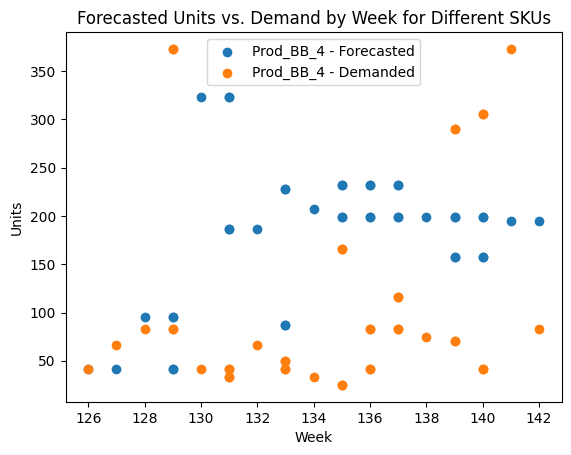

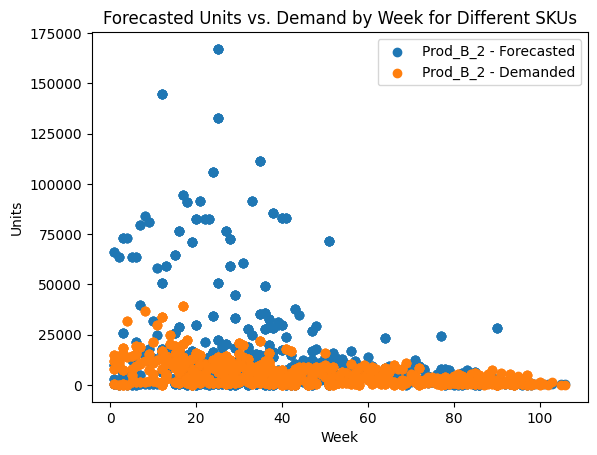

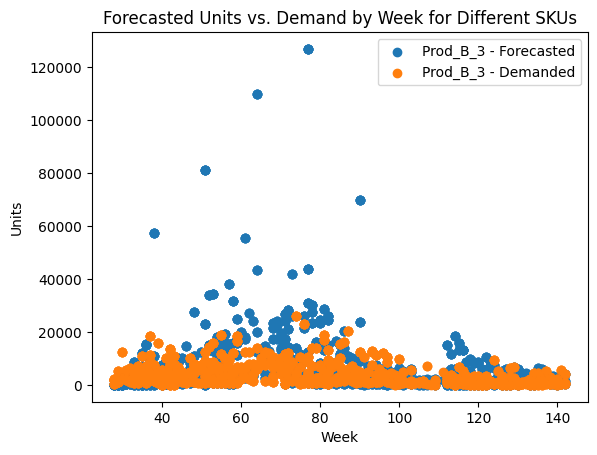

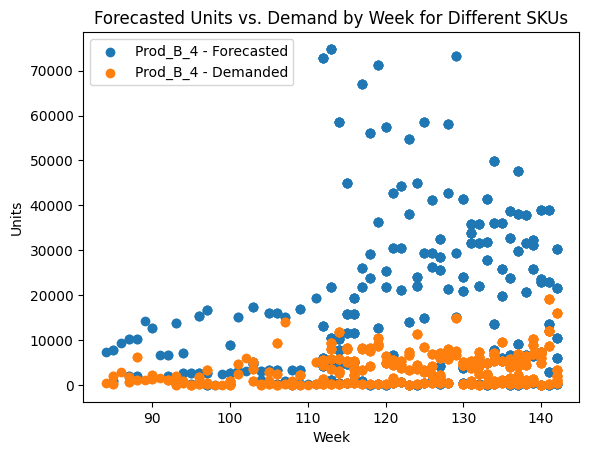

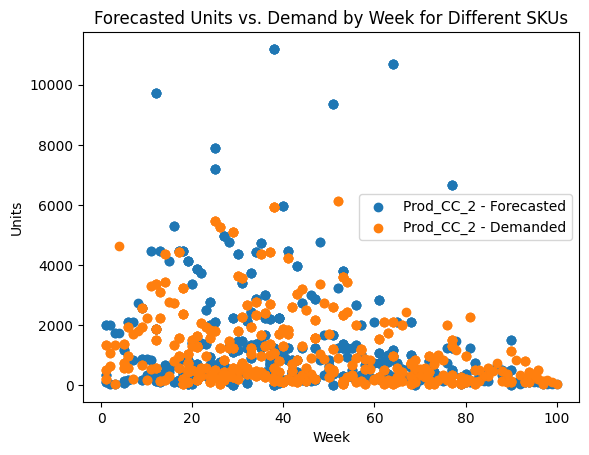

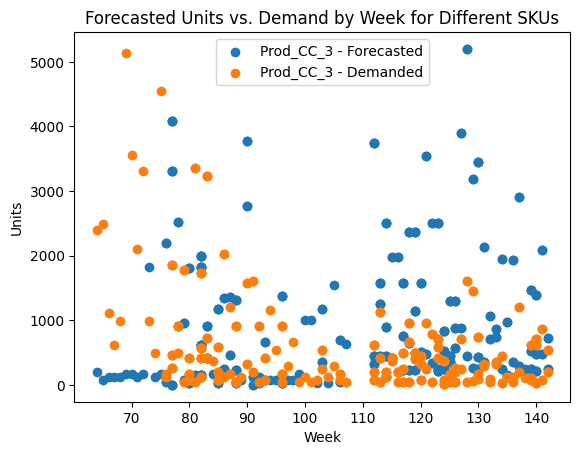

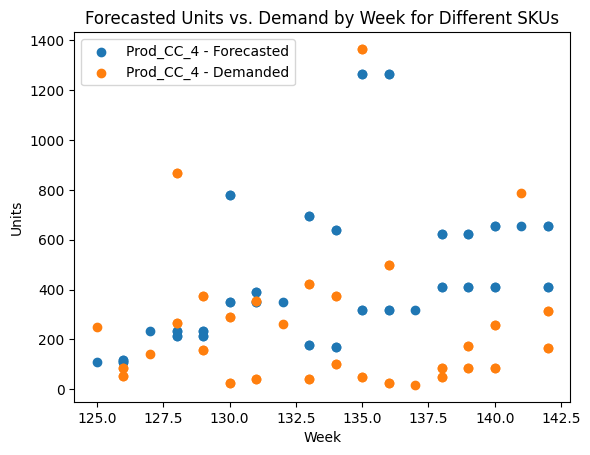

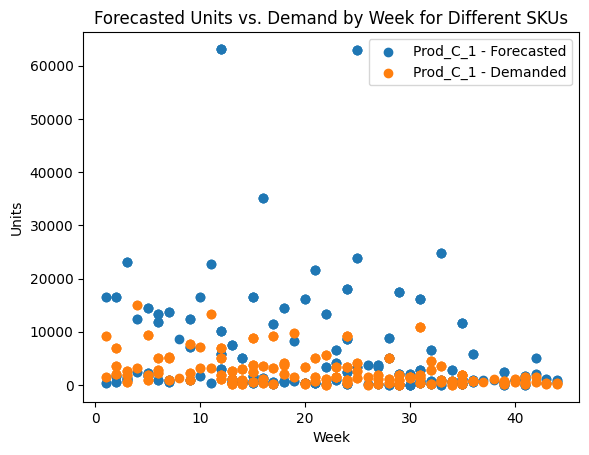

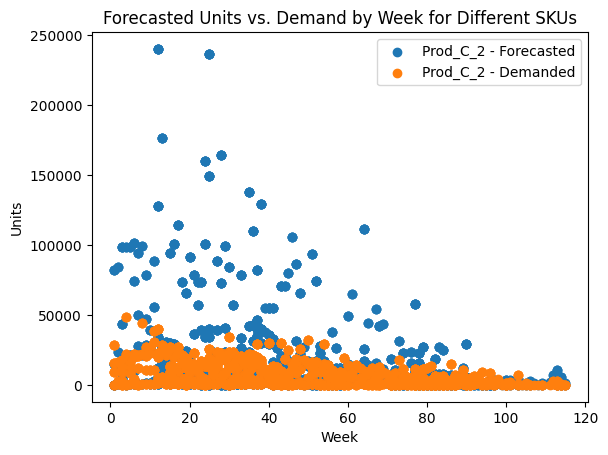

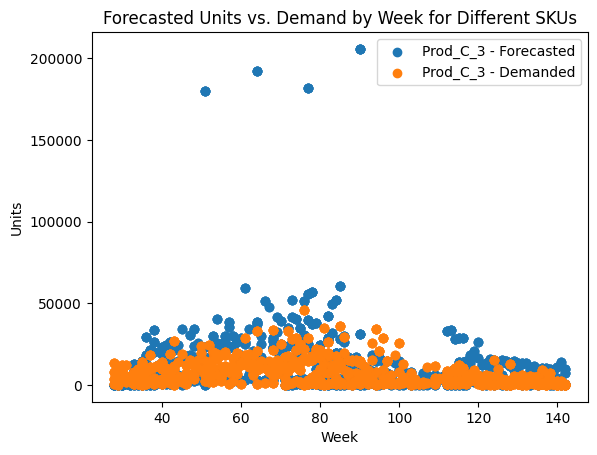

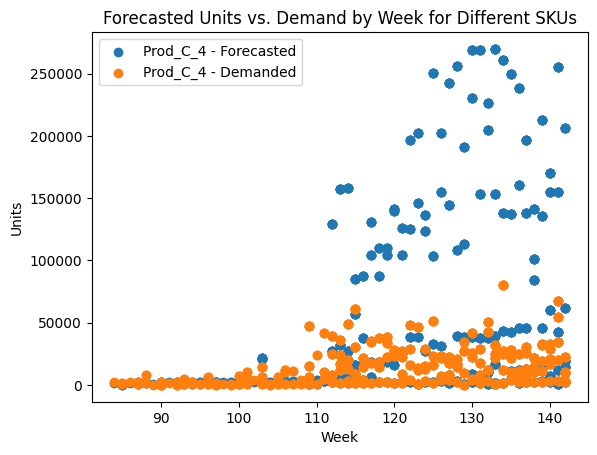

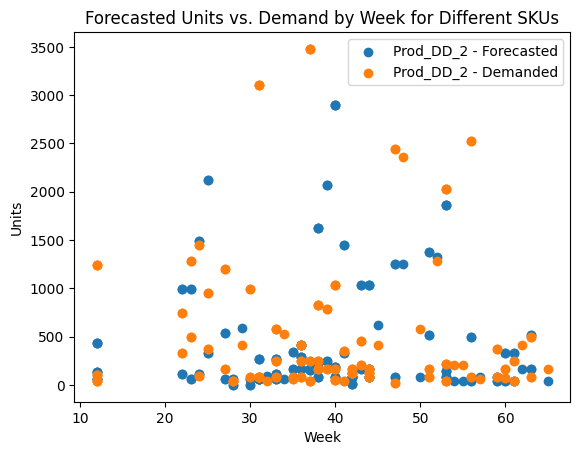

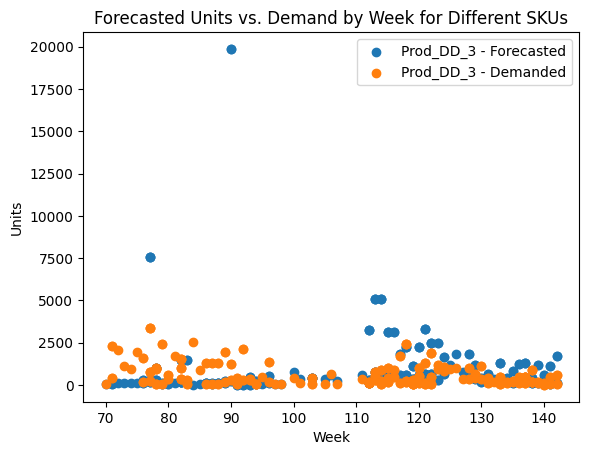

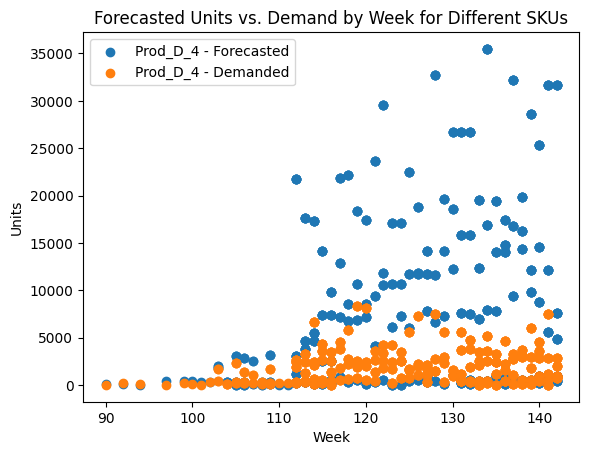

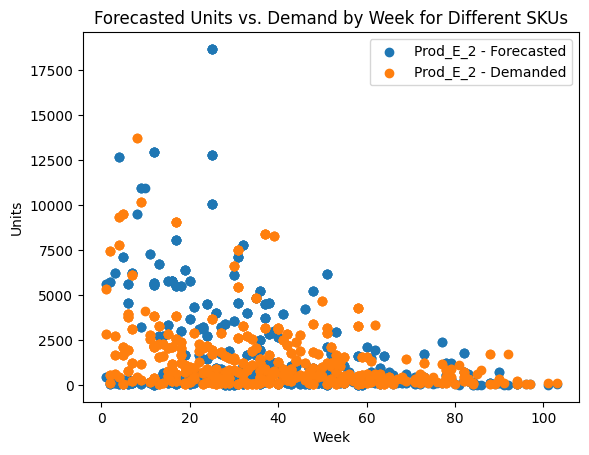

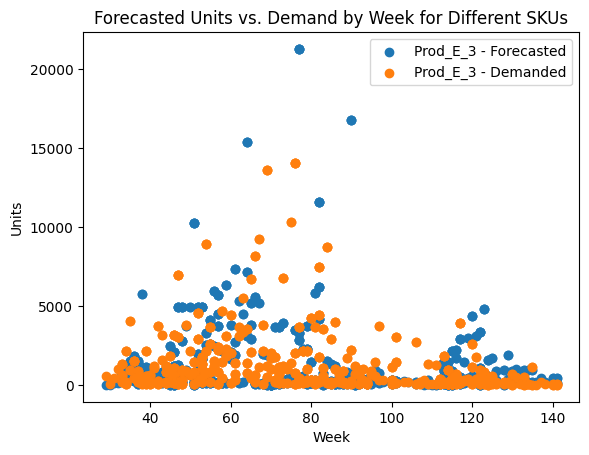

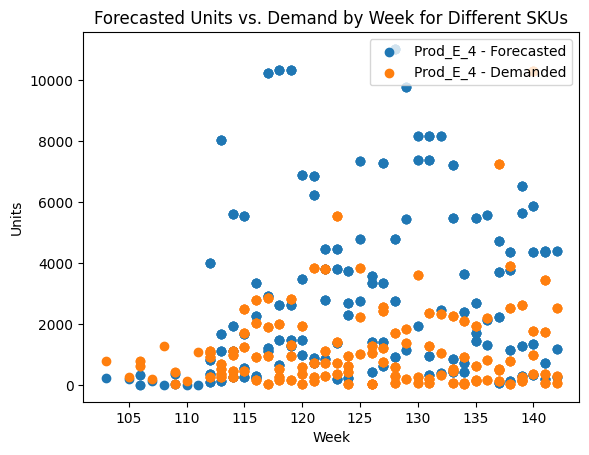

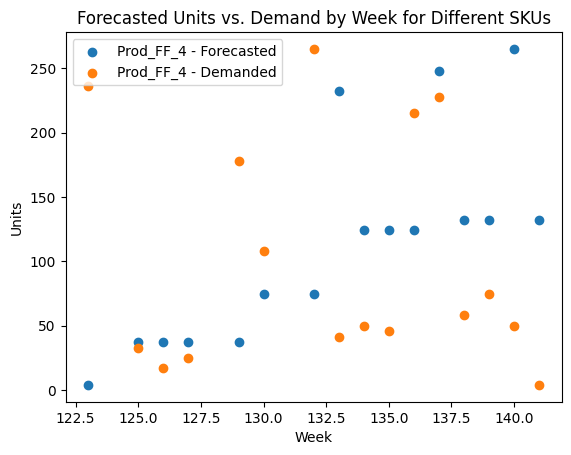

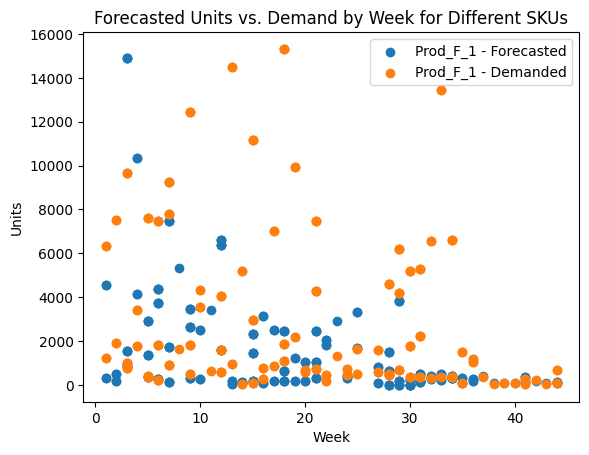

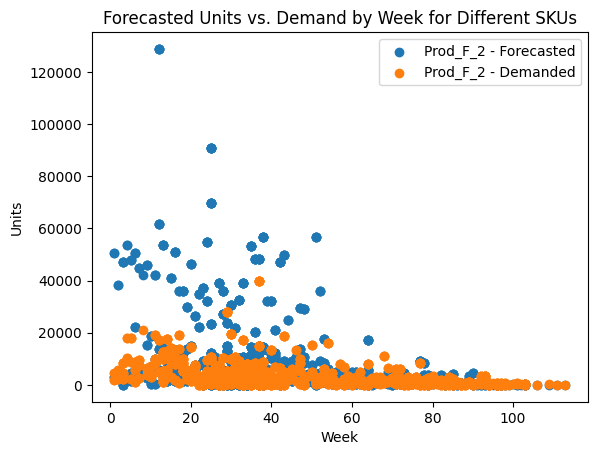

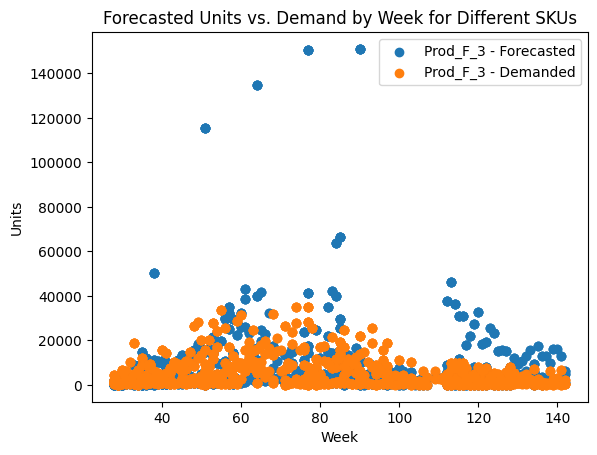

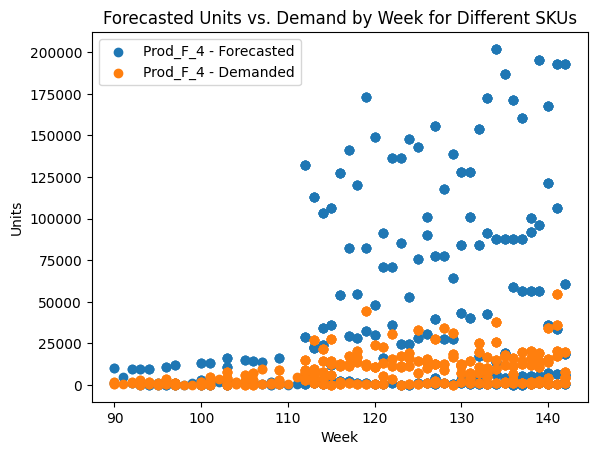

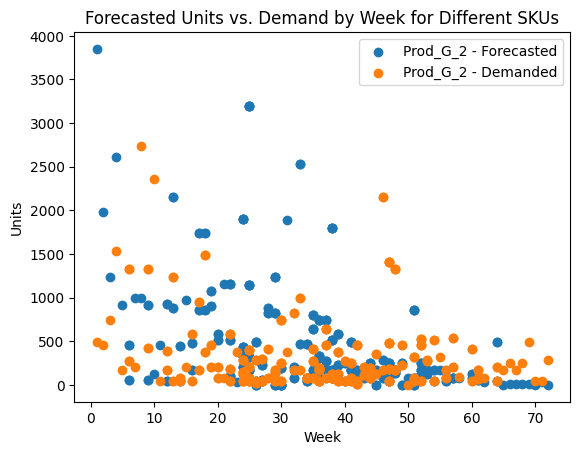

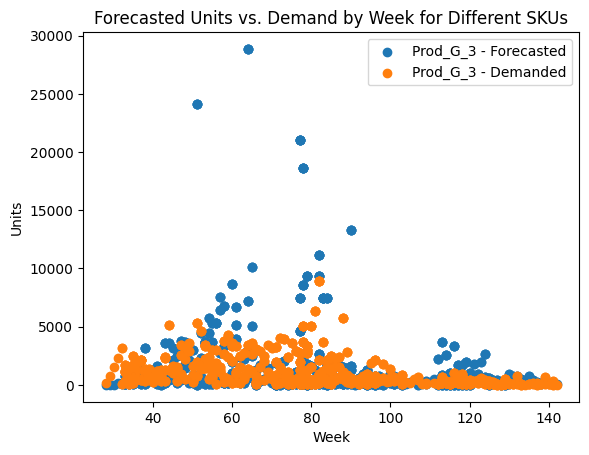

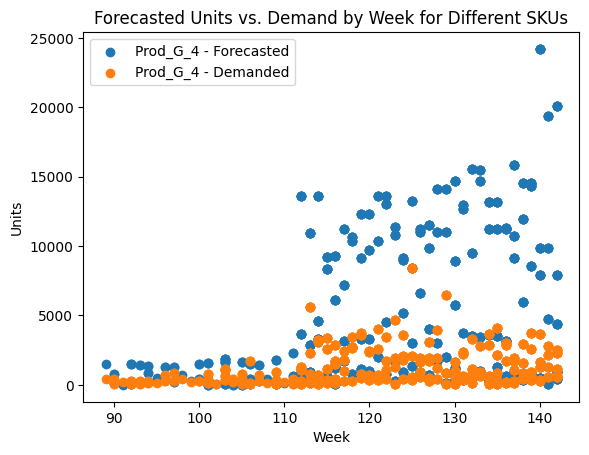

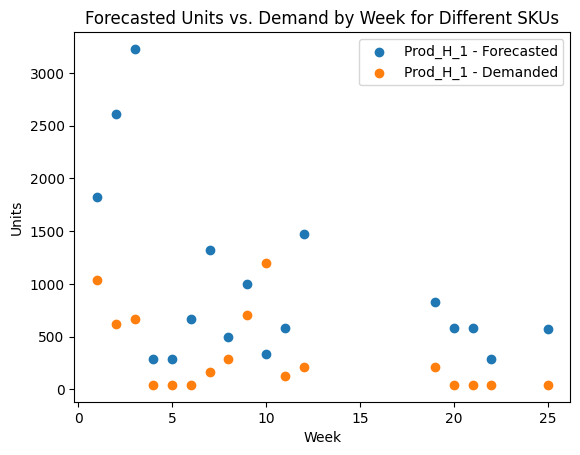

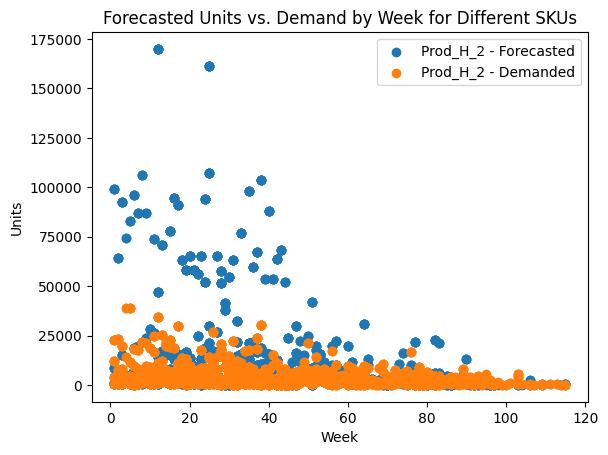

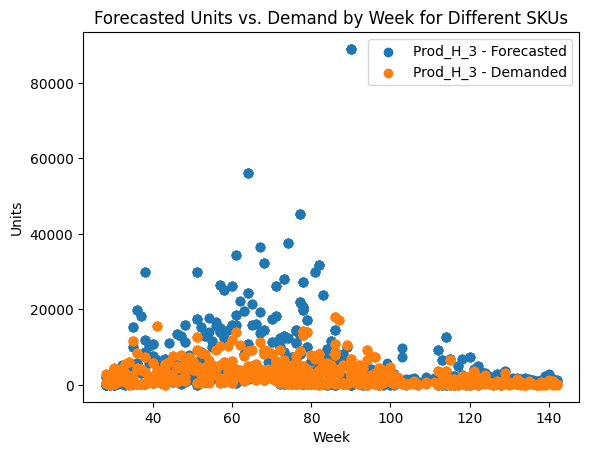

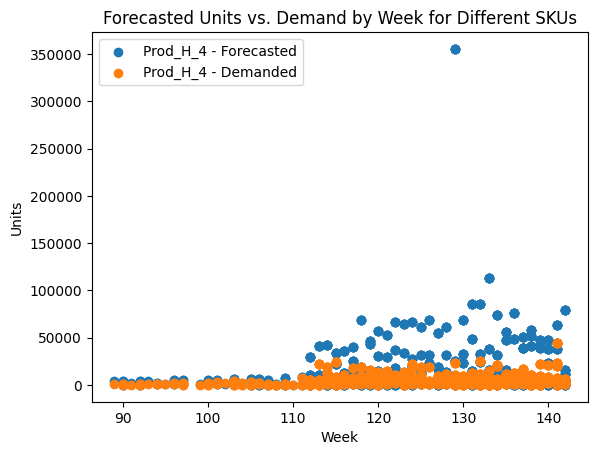

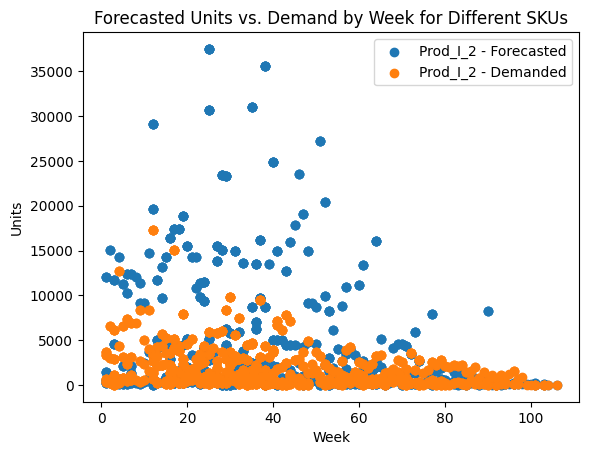

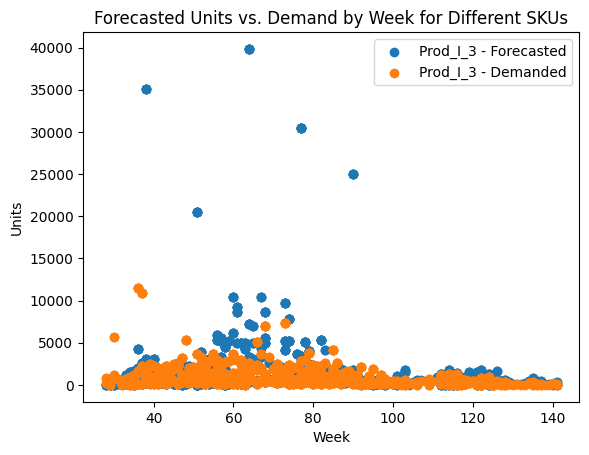

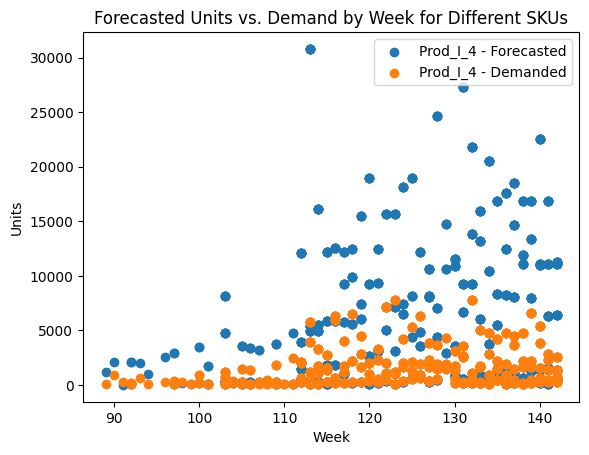

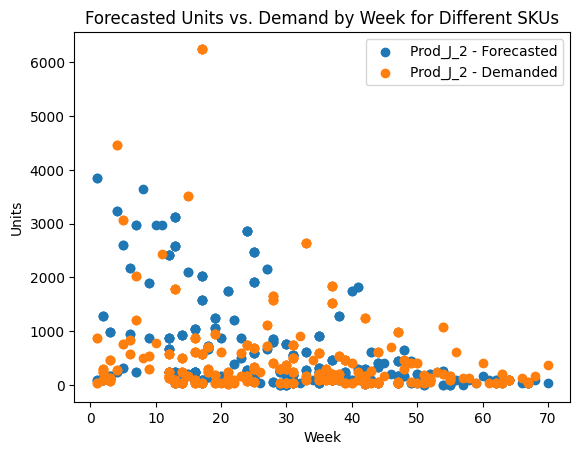

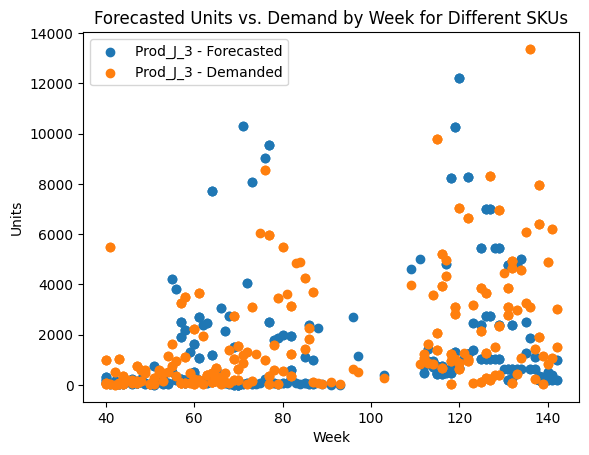

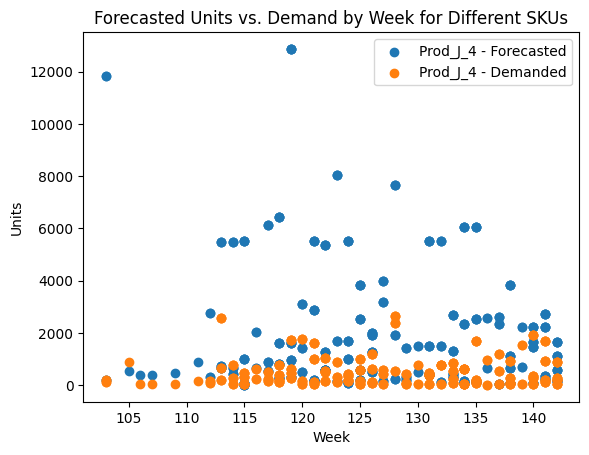

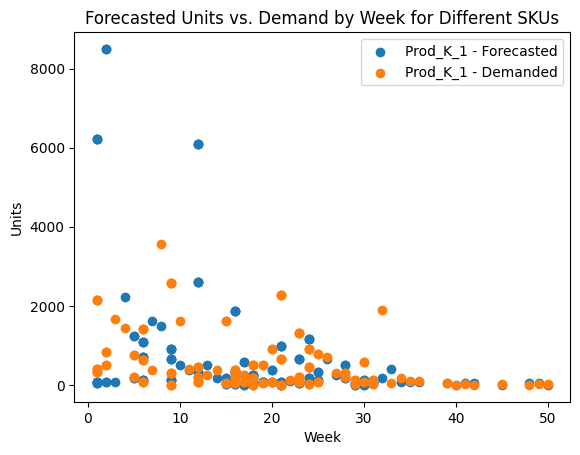

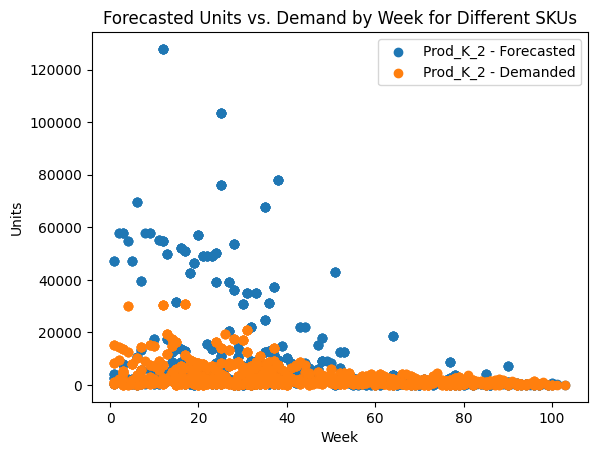

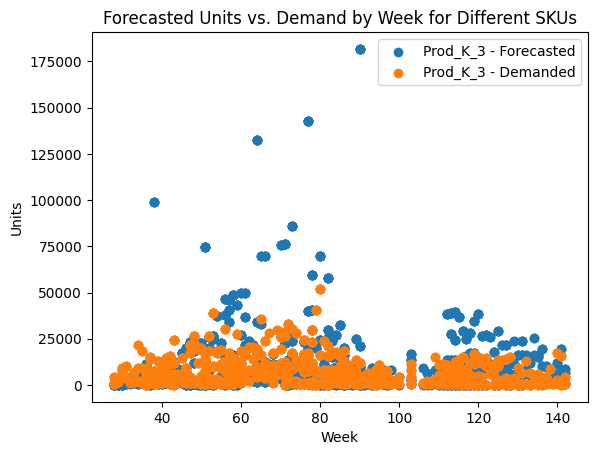

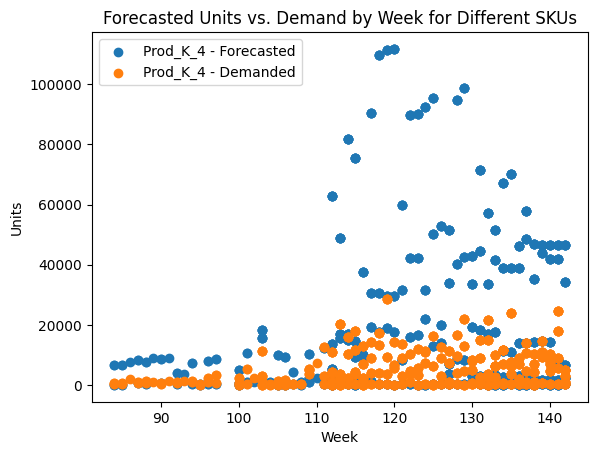

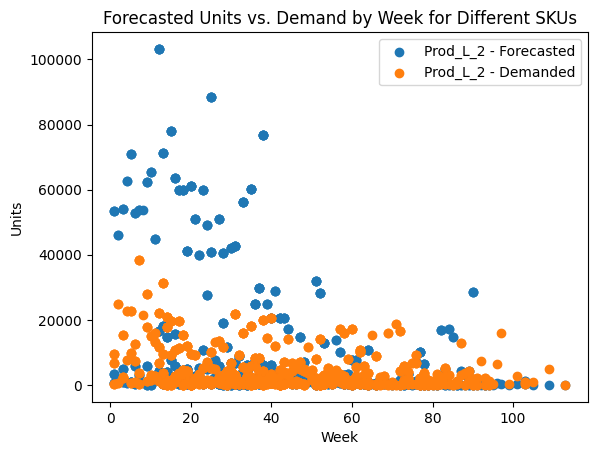

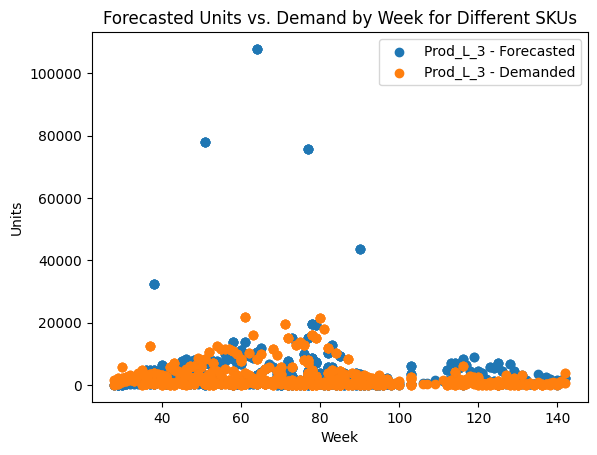

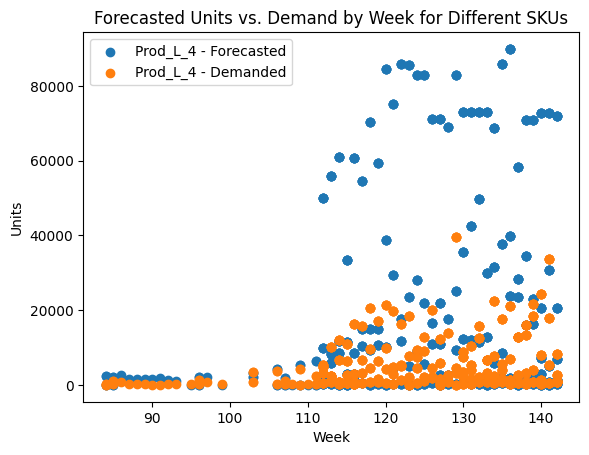

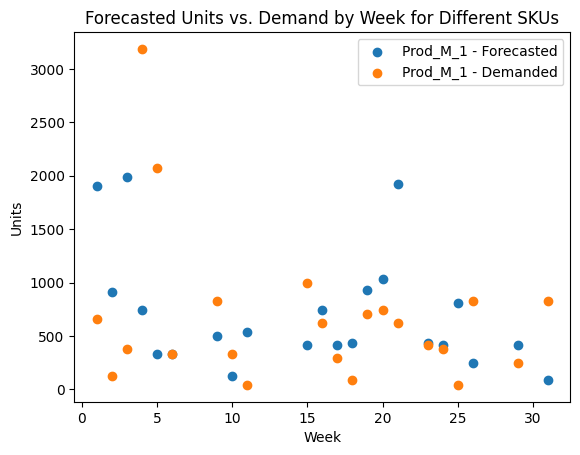

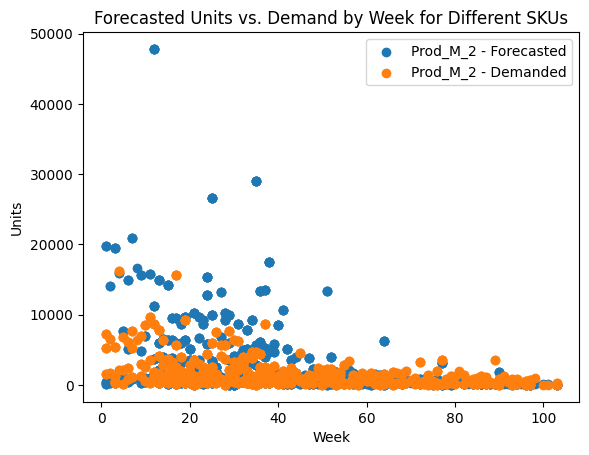

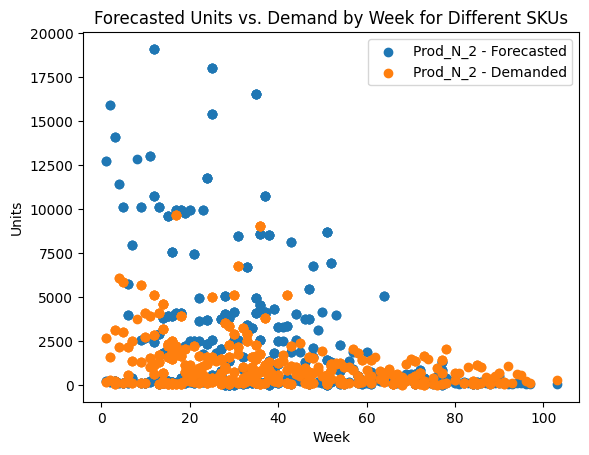

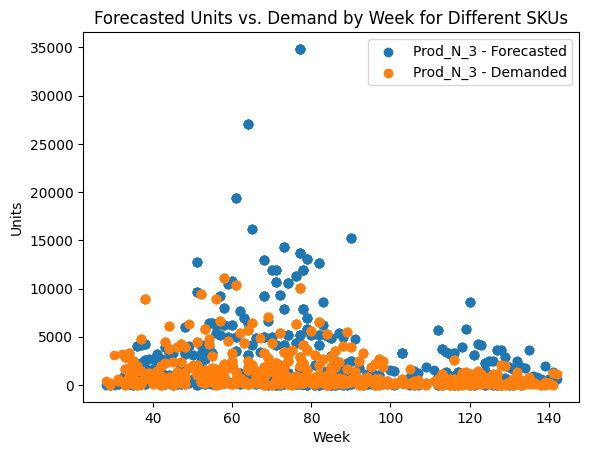

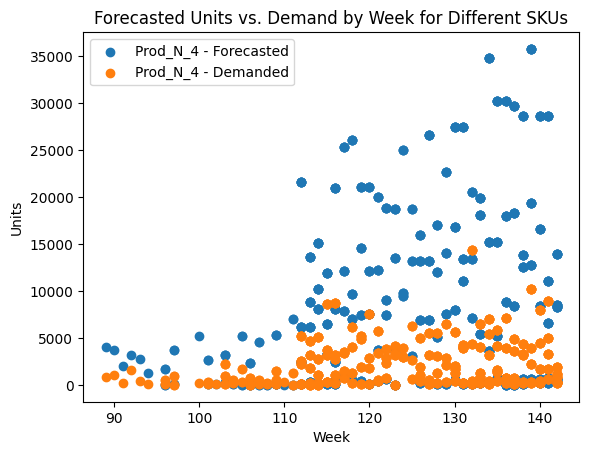

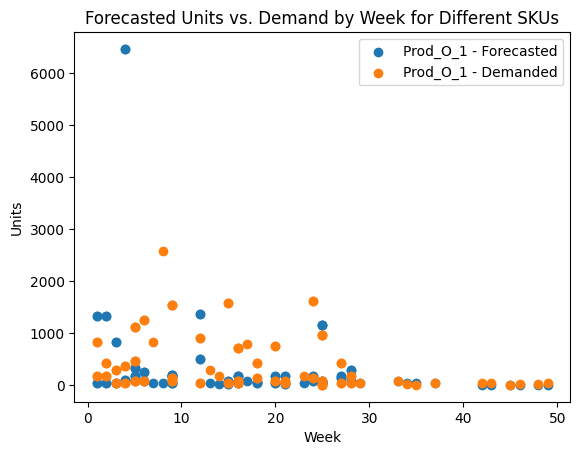

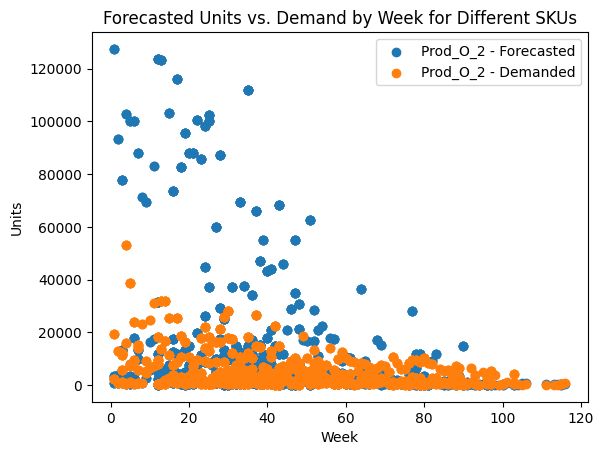

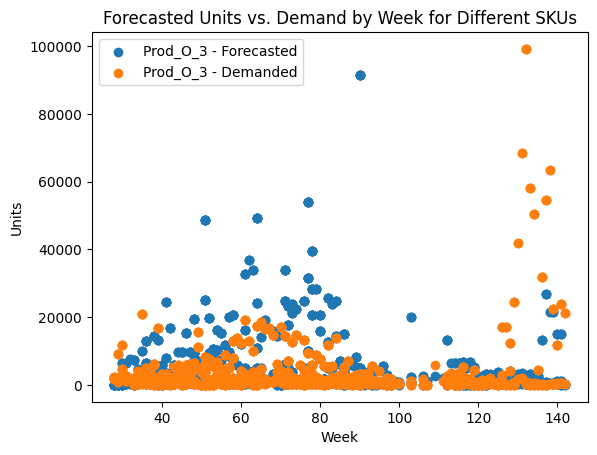

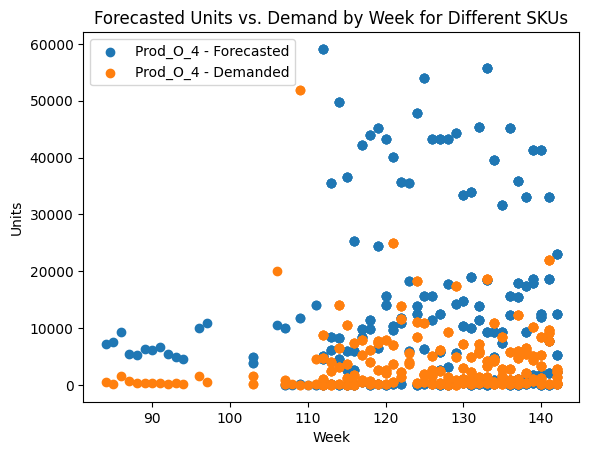

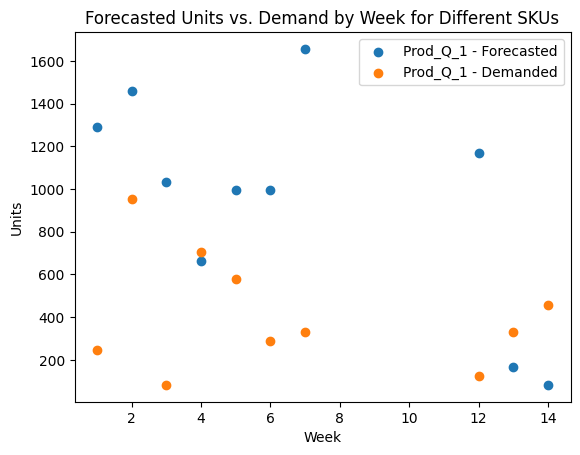

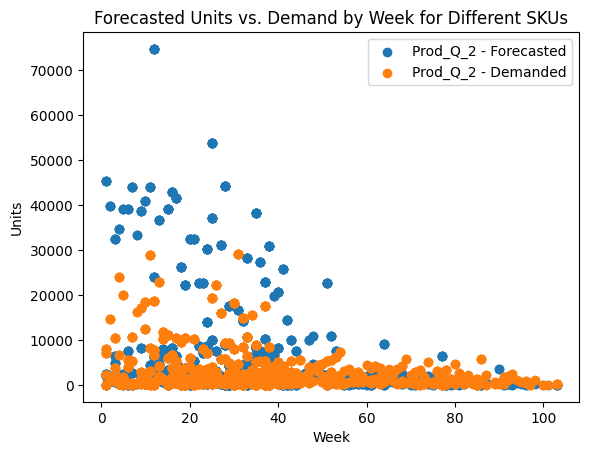

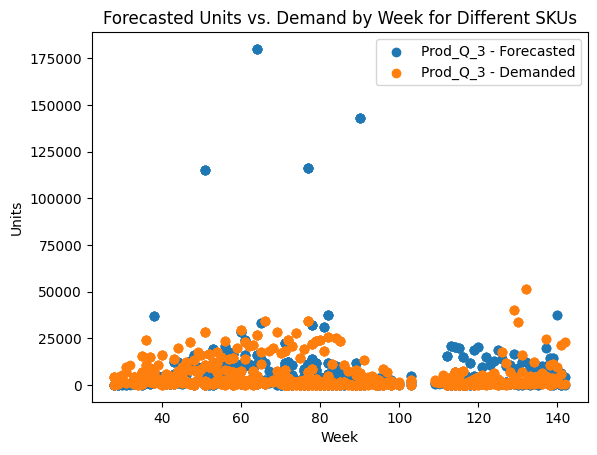

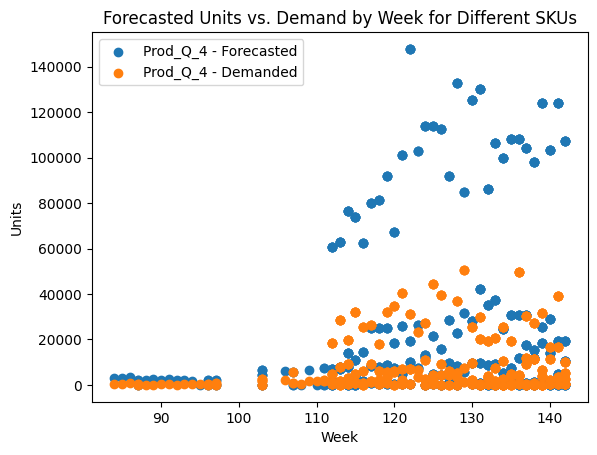

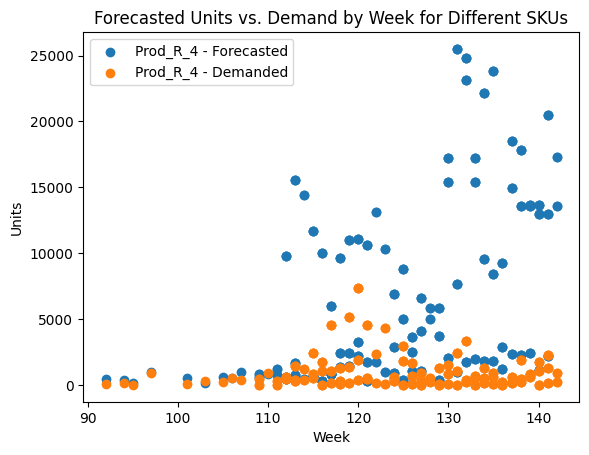

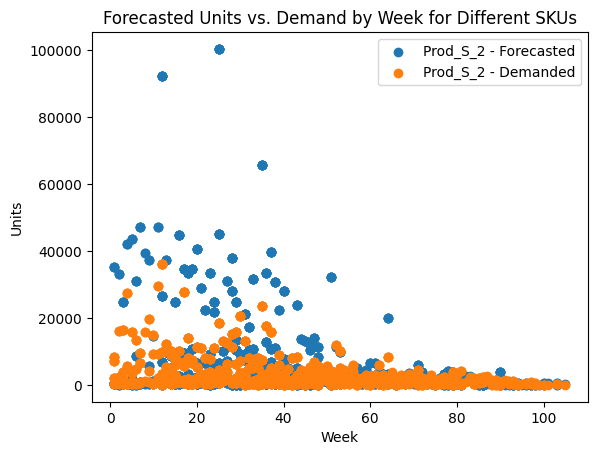

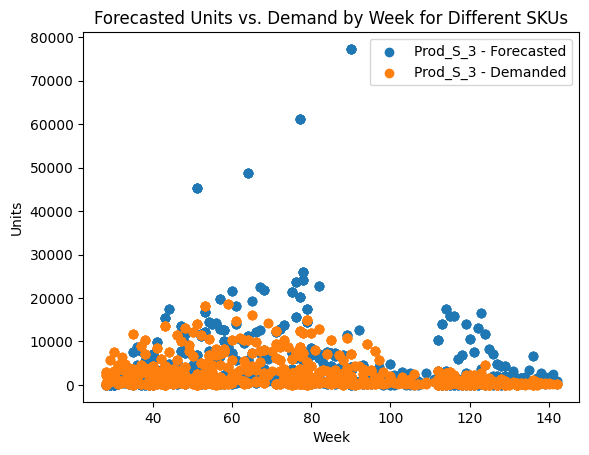

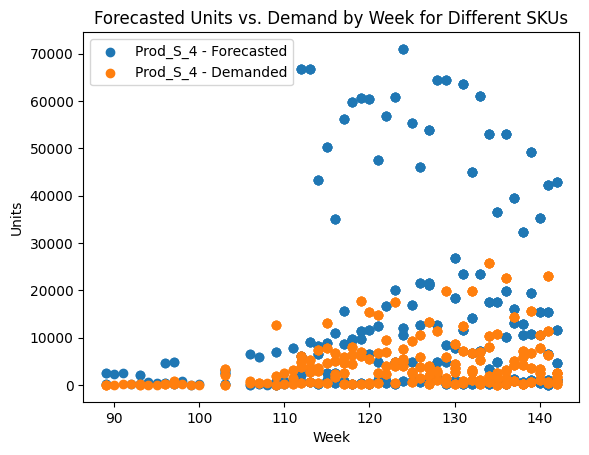

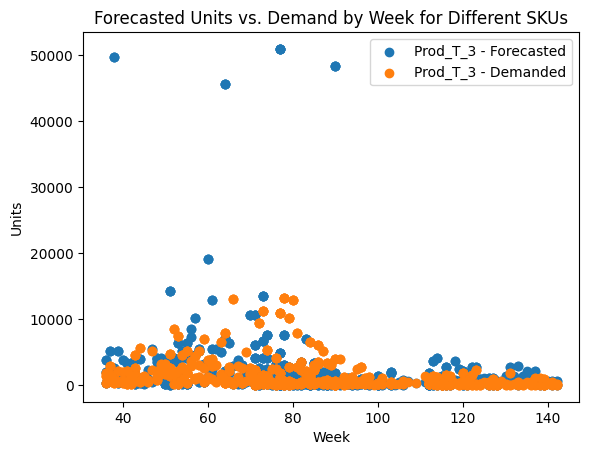

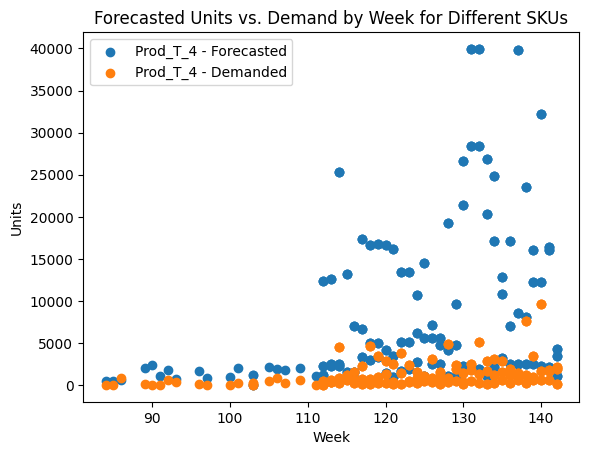

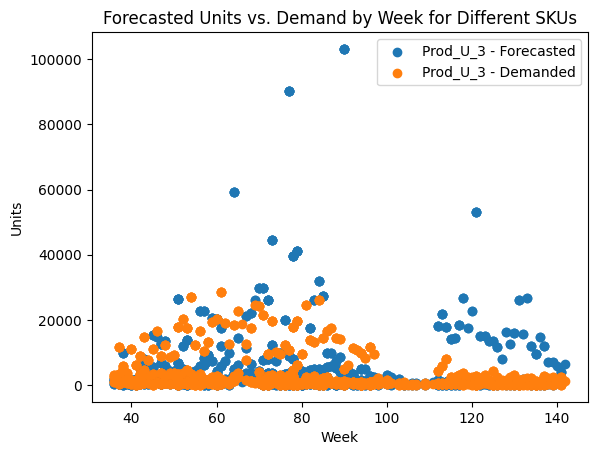

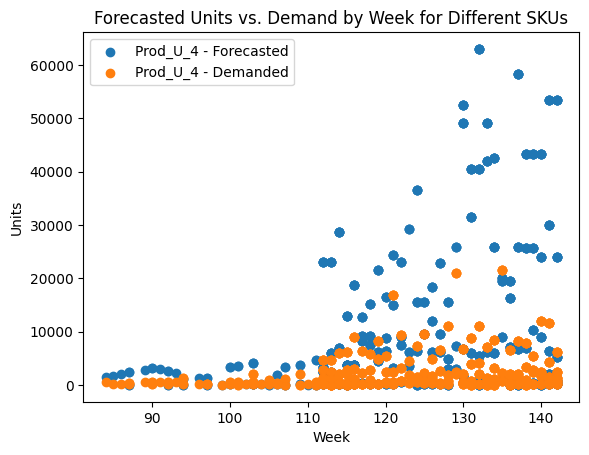

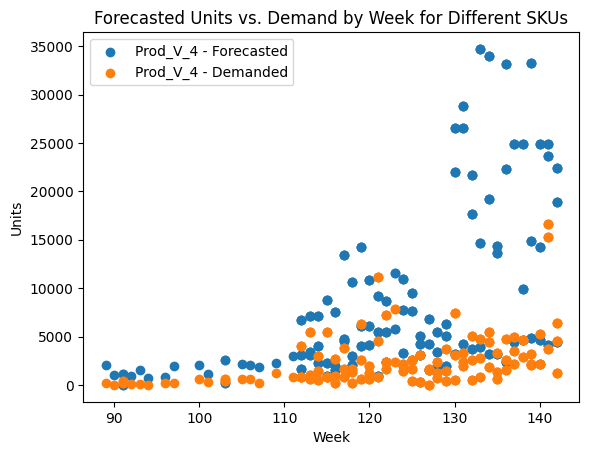

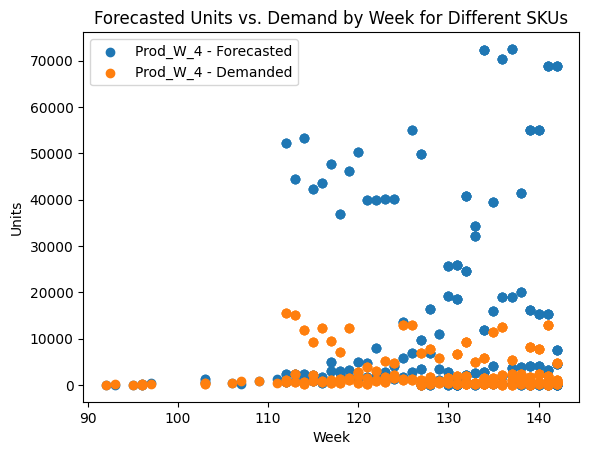

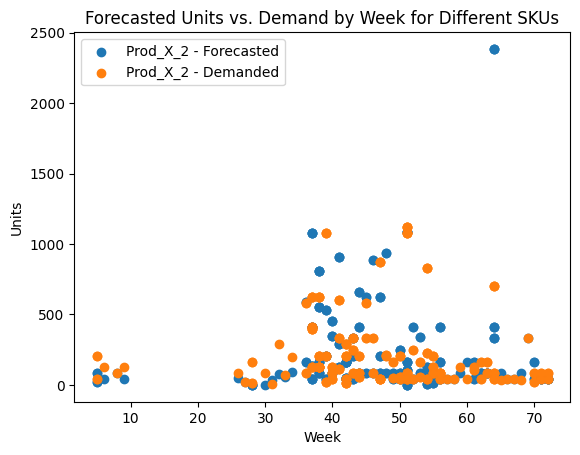

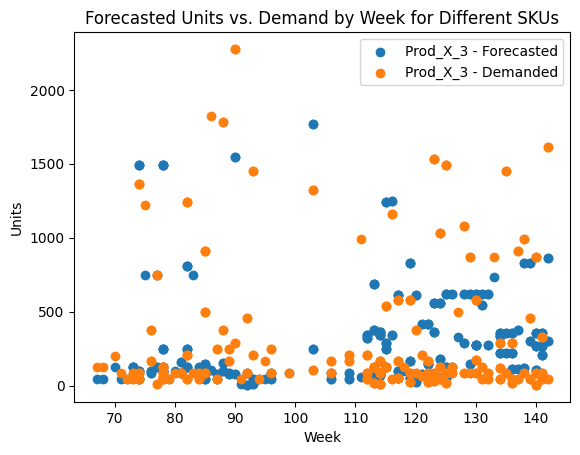

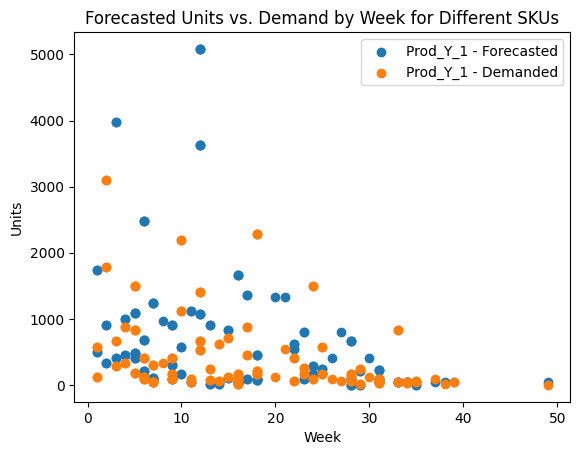

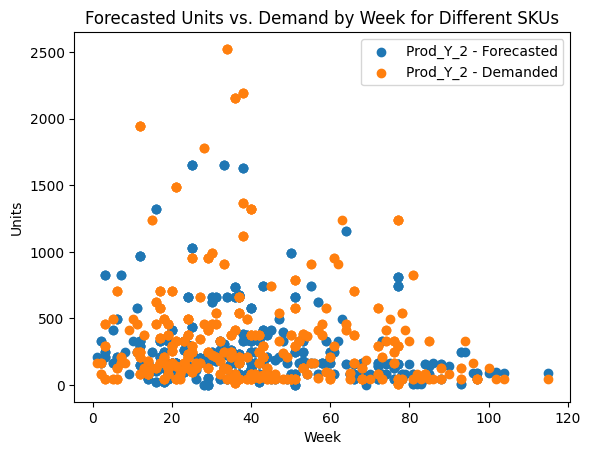

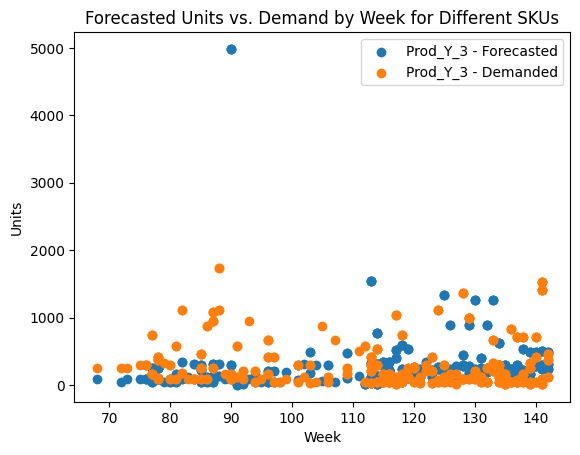

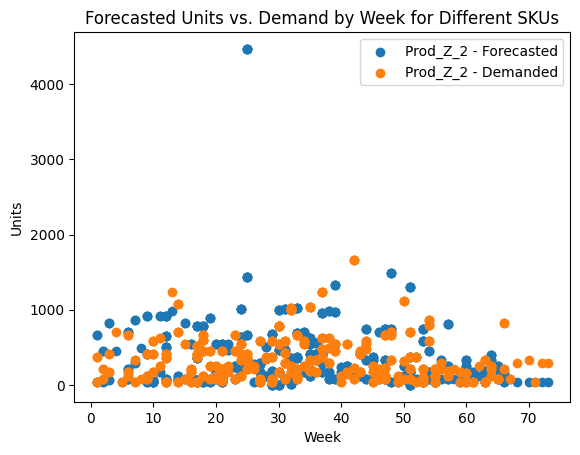

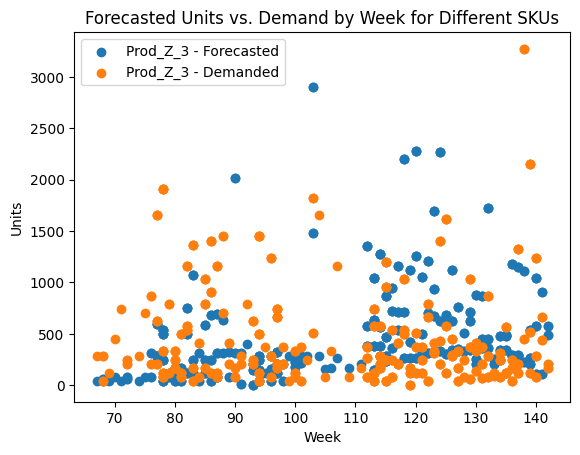

In [30]:
merged_df = pd.merge(data_subset_fore, data_subset_dem, on=['SKU_Code', 'Week'])

# Group by 'sku' and iterate over groups
for sku, group_df in merged_df.groupby('SKU_Code'):
    # Plotting forecast data
    plt.scatter(group_df['Week'], group_df['Forecasted'], label=f'{sku} - Forecasted')

    # Plotting demand data
    plt.scatter(group_df['Week'], group_df['Unconstrained_Demand'], label=f'{sku} - Demanded')

    plt.xlabel('Week')
    plt.ylabel('Units')
    plt.title('Forecasted Units vs. Demand by Week for Different SKUs')
    plt.legend()
    plt.show()